# Import liabraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet

# Dowload and Explore the Dataset

In [27]:
# Dowload the dataset
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip

--2021-04-10 18:35:36--  http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
Resolving vision.cs.utexas.edu (vision.cs.utexas.edu)... 128.83.120.116
Connecting to vision.cs.utexas.edu (vision.cs.utexas.edu)|128.83.120.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305323328 (291M) [application/zip]
Saving to: ‘ut-zap50k-images.zip’

ut-zap50k-images.zi 100%[===================>] 291.18M  73.4MB/s    in 4.2s    

2021-04-10 18:35:41 (69.2 MB/s) - ‘ut-zap50k-images.zip’ saved [305323328/305323328]



In [ ]:
!unzip ut-zap50k-images.zip

In [29]:
import os
import shutil

#from google.colab import drive
#drive.mount('content/')

os.getcwd()
# root = '/content/ut-zap50k-images'
root = 'ut-zap50k-images'
subfolder_name = []
def makedir(dirname):
  foldernames = os.listdir(dirname)
  for subfolder in foldernames:
    subfolder_name.append(subfolder)
    if not os.path.exists(subfolder):
      os.makedirs(subfolder)

def searchdir(dirname):
  filenames = os.listdir(dirname)

  for filename in filenames:
    full_filename = os.path.join(dirname, filename)
    base_folder_name = full_filename.split('/')[1]
    # print(full_filename.split('/')[1])

    if os.path.isdir(full_filename):
      searchdir(full_filename)
    else:
      shutil.move(full_filename, base_folder_name + '/' + os.path.basename(full_filename))

makedir(root)
searchdir(root)

In [30]:
!mkdir data

In [31]:
!mv Boots Sandals Shoes Slippers data

In [32]:
# A folder to hold a subset for testing models
!mkdir data2

In [33]:
!mkdir data2/Boots data2/Sandals data2/Shoes data2/Slippers

In [34]:
# https://unix.stackexchange.com/questions/217712/randomly-copy-certain-amount-of-certain-file-type-from-one-directory-into-anothe
# copy a subset of the dataset

!find data/Boots -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -vt data2/Boots

'data/Boots/8019987.6.jpg' -> 'data2/Boots/8019987.6.jpg'
'data/Boots/8020099.3.jpg' -> 'data2/Boots/8020099.3.jpg'
'data/Boots/8055310.3.jpg' -> 'data2/Boots/8055310.3.jpg'
'data/Boots/8113243.3.jpg' -> 'data2/Boots/8113243.3.jpg'
'data/Boots/7969026.768.jpg' -> 'data2/Boots/7969026.768.jpg'
'data/Boots/8019844.84.jpg' -> 'data2/Boots/8019844.84.jpg'
'data/Boots/7191011.3.jpg' -> 'data2/Boots/7191011.3.jpg'
'data/Boots/8050347.81304.jpg' -> 'data2/Boots/8050347.81304.jpg'
'data/Boots/7976528.19.jpg' -> 'data2/Boots/7976528.19.jpg'
'data/Boots/8003538.352769.jpg' -> 'data2/Boots/8003538.352769.jpg'
'data/Boots/7679415.568.jpg' -> 'data2/Boots/7679415.568.jpg'
'data/Boots/8009539.366241.jpg' -> 'data2/Boots/8009539.366241.jpg'
'data/Boots/7606526.196882.jpg' -> 'data2/Boots/7606526.196882.jpg'
'data/Boots/7342759.73932.jpg' -> 'data2/Boots/7342759.73932.jpg'
'data/Boots/8037585.106.jpg' -> 'data2/Boots/8037585.106.jpg'
'data/Boots/7847744.3.jpg' -> 'data2/Boots/7847744.3.jpg'
'data/Boot

In [35]:
!find data/Sandals -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Sandals

In [36]:
!find data/Shoes -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Shoes

In [37]:
!find data/Slippers -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Slippers

In [40]:
import pathlib
data_dir = pathlib.Path("data")
boots_count = len(list(data_dir.glob('Boots/*.jpg')))
sandals_count = len(list(data_dir.glob('Sandals/*.jpg')))
shoes_count = len(list(data_dir.glob('Shoes/*.jpg')))
slippers_count = len(list(data_dir.glob('Slippers/*.jpg')))
print(boots_count, sandals_count, shoes_count, slippers_count)
print(f"Total = {boots_count + sandals_count + shoes_count + slippers_count}")

12832 5741 30169 1283
Total = 50025


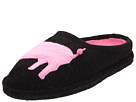

In [41]:
import PIL
import PIL.Image

boots = list(data_dir.glob('Boots/*.jpg'))
sandals = list(data_dir.glob('Sandals/*.jpg'))
shoes = list(data_dir.glob('Shoes/*.jpg'))
slippers = list(data_dir.glob('Slippers/*.jpg'))

PIL.Image.open(str(slippers[0]))

In [42]:
sandals[0], slippers[1], 

(PosixPath('data/Sandals/7293837.261626.jpg'),
 PosixPath('data/Slippers/7486138.359.jpg'))

In [43]:
# double check the dimention of each image
import cv2
boots_shapes = []
sandals_shapes = []
shoes_shapes = []
slippers_shapes = []
for i in range(boots_count):
  im1 = cv2.imread(str(boots[i]))
  boots_shapes.append(im1.shape)

for i in range(sandals_count):
  im2 = cv2.imread(str(sandals[i]))
  sandals_shapes.append(im2.shape)

for i in range(shoes_count):
  im3 = cv2.imread(str(shoes[i]))
  shoes_shapes.append(im3.shape)

for i in range(slippers_count):
  im4 = cv2.imread(str(slippers[i]))
  slippers_shapes.append(im4.shape)

  # print(type(im))  # <class 'numpy.ndarray'>


In [44]:
np.mean(boots_shapes, axis=0), np.mean(sandals_shapes, axis=0), np.mean(shoes_shapes, axis=0), np.mean(slippers_shapes, axis=0)

(array([102., 136.,   3.]),
 array([102.        , 135.99965163,   3.        ]),
 array([102., 136.,   3.]),
 array([102., 136.,   3.]))

In [45]:
for i in range(sandals_count):
  if sandals_shapes[i][1]< 136:
    print(sandals_shapes[i])


(102, 135, 3)
(102, 135, 3)


In [ ]:
sandals_shapes[1][1]

136

# Image Preprocessing 

## Create The dataset for TF

In [46]:
image_size = (102, 136) 
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data2",
    labels = 'inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data2",
    labels = 'inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 104 files belonging to 4 classes.
Using 84 files for training.
Found 104 files belonging to 4 classes.
Using 20 files for validation.


In [ ]:
# View a single example entry from a batch
features, label = iter(train_ds).next()
print("example features:", features[0])
print("example label:", label[0])

example features: tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(102, 136, 3), dtype=float32)
example label: tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)


In [ ]:
# The class names that is inferred from the folders names
class_names = train_ds.class_names
print(class_names)

['Boots', 'Sandals', 'Shoes', 'Slippers']


In [ ]:
# print("example label:", list(label[0].numpy()).index(1))

example label: 2


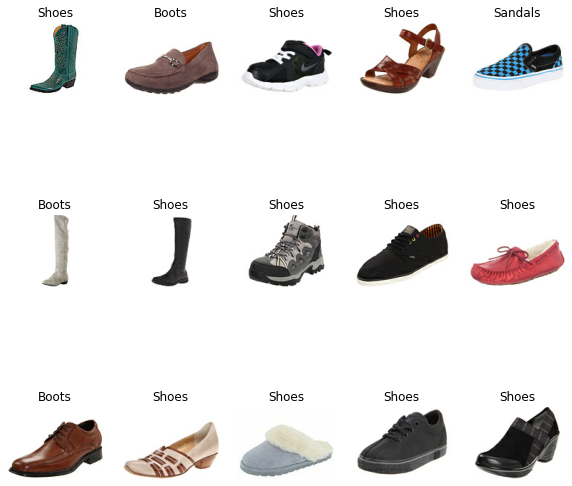

In [ ]:
#Visualize a random subset of the training data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[list(label[i].numpy()).index(1)])    
    plt.axis("off")

In [ ]:
# Check the batch shape
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 102, 136, 3)
(32, 4)


In [ ]:
# Configure the dataset for performance

# train_ds = train_ds.prefetch(buffer_size=32)
# val_ds = val_ds.prefetch(buffer_size=32)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input

In [ ]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(102, 136, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# create the base pre-trained model
# base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False



In [ ]:
epochs = 10

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/10
1251/1251 [==============================] - 64s 49ms/step - loss: 45.1006 - accuracy: 0.7149 - val_loss: 0.4983 - val_accuracy: 0.8245
Epoch 2/10
1251/1251 [==============================] - 59s 47ms/step - loss: 0.5780 - accuracy: 0.8234 - val_loss: 0.4202 - val_accuracy: 0.8586
Epoch 3/10
1251/1251 [==============================] - 59s 47ms/step - loss: 0.5161 - accuracy: 0.8386 - val_loss: 0.4974 - val_accuracy: 0.8290
Epoch 4/10
1251/1251 [==============================] - 59s 47ms/step - loss: 0.4788 - accuracy: 0.8454 - val_loss: 0.4141 - val_accuracy: 0.8651
Epoch 5/10
1251/1251 [==============================] - 59s 47ms/step - loss: 0.4466 - accuracy: 0.8550 - val_loss: 0.4637 - val_accuracy: 0.8446
Epoch 6/10
1251/1251 [==============================] - 58s 47ms/step - loss: 0.4507 - accuracy: 0.8556 - val_loss: 0.4276 - val_accuracy: 0.8610
Epoch 7/10
1251/1251 [==============================] - 59s 47ms/step - loss: 0.4325 - accuracy: 0.8610 - val_loss: 0.3986 

In [ ]:
# small dataset

epochs = 10

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/10
3/3 [==============================] - 37s 1s/step - loss: 741.3154 - accuracy: 0.4230 - val_loss: 844.4233 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 0s 105ms/step - loss: 661.6199 - accuracy: 0.2861 - val_loss: 568.1359 - val_accuracy: 0.4000
Epoch 3/10
3/3 [==============================] - 0s 114ms/step - loss: 240.0905 - accuracy: 0.5686 - val_loss: 266.2350 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 110ms/step - loss: 108.3272 - accuracy: 0.6297 - val_loss: 352.9018 - val_accuracy: 0.3000
Epoch 5/10
3/3 [==============================] - 0s 101ms/step - loss: 170.4978 - accuracy: 0.4176 - val_loss: 168.7582 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 107ms/step - loss: 66.6077 - accuracy: 0.7108 - val_loss: 96.7060 - val_accuracy: 0.3500
Epoch 7/10
3/3 [==============================] - 0s 106ms/step - loss: 53.2386 - accuracy: 0.5908 - val_loss: 224.0308 - val_accuracy: 0.30

In [ ]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True


0 input_2
1 conv2d_94
2 batch_normalization_94
3 activation_94
4 conv2d_95
5 batch_normalization_95
6 activation_95
7 conv2d_96
8 batch_normalization_96
9 activation_96
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_97
13 activation_97
14 conv2d_98
15 batch_normalization_98
16 activation_98
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_102
20 activation_102
21 conv2d_100
22 conv2d_103
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_109
42 batch_normalization_109
43 activation_109
44 conv2d_107
45 conv2d_110
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_106
52 conv2d_108
53 conv2d

In [ ]:
epochs = 10

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save2nd_at_{epoch}.h5", monitor='val_loss', verbose=0, save_best_only=True),
]
# model.compile(
#     optimizer='rmsprop', 
#     loss='categorical_crossentropy',
#     metrics=["accuracy"],
# )

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=["accuracy"],)

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/10
1251/1251 [==============================] - 76s 57ms/step - loss: 0.6063 - accuracy: 0.7904 - val_loss: 0.3926 - val_accuracy: 0.8606
Epoch 2/10
1251/1251 [==============================] - 72s 58ms/step - loss: 0.3733 - accuracy: 0.8698 - val_loss: 0.3420 - val_accuracy: 0.8847
Epoch 3/10
1251/1251 [==============================] - 70s 56ms/step - loss: 0.3216 - accuracy: 0.8860 - val_loss: 0.3149 - val_accuracy: 0.8902
Epoch 4/10
1251/1251 [==============================] - 71s 57ms/step - loss: 0.2888 - accuracy: 0.8973 - val_loss: 0.3052 - val_accuracy: 0.8930
Epoch 5/10
1251/1251 [==============================] - 71s 56ms/step - loss: 0.2638 - accuracy: 0.9070 - val_loss: 0.2954 - val_accuracy: 0.8973
Epoch 6/10
1251/1251 [==============================] - 72s 57ms/step - loss: 0.2456 - accuracy: 0.9105 - val_loss: 0.2978 - val_accuracy: 0.8968
Epoch 7/10
1251/1251 [==============================] - 70s 56ms/step - loss: 0.2252 - accuracy: 0.9175 - val_loss: 0.3008 -